# Microsoft Movie Needs Analysis

[Insert image here]

## Overview

### Business Problem

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime

In [2]:
title_basics  = pd.read_csv("unzippedData/imdb.title.basics.csv")
ratings = pd.read_csv('imdb.title.ratings.csv.gz')

In [3]:
movies_info = title_basics.merge(ratings, how='left', on='tconst')
movies_info.rename({'primary_title' : 'movie', 
                    'start_year' : 'release_year'}, axis =1, inplace= True)
movies_info['release_year'] = movies_info['release_year'].astype(int)
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   movie            146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   release_year     146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [4]:
movies_info.head()

,tconst,movie,original_title,release_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [5]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
movie_budgets['release_year'] = movie_budgets['release_date'].map(lambda x: int(x[-4:]))

In [7]:
# lambda function starts index at 1 to remove $ in value, converts to int 
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].map(lambda x: int(x[1:].replace(",","")))
movie_budgets['production_budget'] = movie_budgets['production_budget'].map(lambda x: int(x[1:].replace(",","")))
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].map(lambda x: int(x[1:].replace(",","")))

In [8]:
movie_budgets["domestic_profit"] = movie_budgets["domestic_gross"] - movie_budgets["production_budget"]
movie_budgets["worldwide_profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

In [9]:
movie_budgets["domestic_roi"] = movie_budgets["domestic_profit"]/movie_budgets['production_budget']
movie_budgets["worldwide_roi"] = movie_budgets["worldwide_profit"]/movie_budgets["production_budget"]

In [10]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,1.028557e+07,5.989970e+07,1.983540,3.800161
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,4.992137e+07,1.460889e+08,26.086591,29.530282
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,-3.072376e+08,-2.002376e+08,-1.000000,-1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,-9.132757e+06,-2.189071e+06,-0.794367,-0.507704
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,-3.487755e+05,8.550286e+06,-0.121674,0.708310
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,1.778144e+07,6.096850e+07,1.058148,2.758346
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,6.306622e+08,2.351345e+09,1799.000000,1799.000000


In [11]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   release_year       5782 non-null   int64  
 7   domestic_profit    5782 non-null   int64  
 8   worldwide_profit   5782 non-null   int64  
 9   domestic_roi       5782 non-null   float64
 10  worldwide_roi      5782 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 497.0+ KB


In [12]:
top_movie_budgets = movie_budgets[(movie_budgets['worldwide_roi']>=5) 
             & ((movie_budgets['production_budget']>=5000000)
             & (movie_budgets['worldwide_gross']>=0))
              & (movie_budgets['release_year'] < 2020) 
                & (movie_budgets['release_year'] >= 2010)]

In [13]:
top_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,630662225,1747311220,2.060988,5.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,378815482,1748134200,1.262718,5.827114
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,398279547,1292935897,1.770131,5.746382
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,437270625,1433854864,2.033817,6.669092
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,500059566,1148258224,2.500298,5.741291


In [14]:
top_movies_df = top_movie_budgets.merge(movies_info, how='left', on =['movie','release_year'])
top_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,original_title,runtime_minutes,genres,averagerating,numvotes
0,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,630662225,1747311220,2.060988,5.710167,NaN,NaN,NaN,NaN,NaN,NaN
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,378815482,1748134200,1.262718,5.827114,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
2,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,398279547,1292935897,1.770131,5.746382,tt0848228,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
3,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,437270625,1433854864,2.033817,6.669092,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,500059566,1148258224,2.500298,5.741291,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0


In [15]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 196 non-null    int64  
 1   release_date       196 non-null    object 
 2   movie              196 non-null    object 
 3   production_budget  196 non-null    int64  
 4   domestic_gross     196 non-null    int64  
 5   worldwide_gross    196 non-null    int64  
 6   release_year       196 non-null    int64  
 7   domestic_profit    196 non-null    int64  
 8   worldwide_profit   196 non-null    int64  
 9   domestic_roi       196 non-null    float64
 10  worldwide_roi      196 non-null    float64
 11  tconst             157 non-null    object 
 12  original_title     157 non-null    object 
 13  runtime_minutes    157 non-null    float64
 14  genres             157 non-null    object 
 15  averagerating      156 non-null    float64
 16  numvotes           156 non

In [16]:
# movies_df.dropna(subset=['averagerating'], inplace=True)
# movies_df = movies_df.fillna(0)
# movies_df['start_year_int'] = movies_df['start_year'].astype(int)
# movies_df['release_year'] = movies_df['release_date'].map(lambda x: int(x[-4:]))
# movies_df[(movies_df['release_year'] == (movies_df['start_year_int'])) 
#      & (movies_df['original_title'] == movies_df['movie'] )]

In [17]:
top_movies_df.drop(top_movies_df[top_movies_df['release_year'] > 2019].index, inplace=True)
top_movies_df['release_year'].min()

2010

In [18]:
top_movies_df = top_movies_df[top_movies_df['movie']== top_movies_df['original_title']]

In [19]:
top_movies_df.drop('original_title', axis=1, inplace=True)

In [20]:
top_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,runtime_minutes,genres,averagerating,numvotes
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,378815482,1748134200,1.262718,5.827114,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
2,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,398279547,1292935897,1.770131,5.746382,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
3,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,437270625,1433854864,2.033817,6.669092,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,500059566,1148258224,2.500298,5.741291,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0
5,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,408581744,1042520711,2.042909,5.212604,tt3606756,118.0,"Action,Adventure,Animation",7.7,203510.0


In [21]:
top_movies_df_columns = list(top_movies_df.columns)
top_movies_df_columns.remove('genres')
top_movies_df_columns

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'release_year',
 'domestic_profit',
 'worldwide_profit',
 'domestic_roi',
 'worldwide_roi',
 'tconst',
 'runtime_minutes',
 'averagerating',
 'numvotes']

In [22]:
top_movies_df.dropna(subset=['genres'], inplace=True)
top_movies_df['genres'] = top_movies_df['genres'].map(lambda x: x.split(","))

top_movies_df = top_movies_df.genres.apply(pd.Series) \
    .merge(top_movies_df, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = top_movies_df_columns , value_name = "genres") \
    .dropna()

In [23]:
top_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,runtime_minutes,averagerating,numvotes,variable,genres
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,378815482,1748134200,1.262718,5.827114,tt4154756,149.0,8.5,670926.0,0,Action
1,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,398279547,1292935897,1.770131,5.746382,tt0848228,143.0,8.1,1183655.0,0,Action
2,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,437270625,1433854864,2.033817,6.669092,tt0369610,124.0,7.0,539338.0,0,Action
3,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,500059566,1148258224,2.500298,5.741291,tt1825683,134.0,7.3,516148.0,0,Action
4,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,408581744,1042520711,2.042909,5.212604,tt3606756,118.0,7.7,203510.0,0,Action


In [34]:
top_movies_df.genres.value_counts()

Drama          74
Comedy         54
Thriller       36
Action         36
Horror         34
Adventure      31
Mystery        30
Romance        23
Sci-Fi         22
Biography      16
Animation      14
Crime          11
Fantasy         8
Music           7
Family          6
History         4
Musical         2
Documentary     2
Sport           2
Western         1
Name: genres, dtype: int64

In [24]:
movies_info.head()

,tconst,movie,original_title,release_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [25]:
movies_info.drop(['tconst', 'original_title', 'runtime_minutes', 'averagerating', 'numvotes'], axis=1, inplace=True)

In [26]:
movies_info.head()

,movie,release_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [27]:
movies_info_columns = list(movies_info.columns)
movies_info_columns.remove('genres')
movies_info_columns

movies_info.dropna(subset=['genres'], inplace=True)
movies_info['genres'] = movies_info['genres'].map(lambda x: x.split(","))

movies_info = movies_info.genres.apply(pd.Series) \
    .merge(movies_info, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = movies_info_columns , value_name = "genres") \
    .dropna()

In [30]:
movies_info.head()

,movie,release_year,variable,genres
0,Sunghursh,2013,0,Action
1,One Day Before the Rainy Season,2019,0,Biography
2,The Other Side of the Wind,2018,0,Drama
3,Sabse Bada Sukh,2018,0,Comedy
4,The Wandering Soap Opera,2017,0,Comedy


In [48]:
movies_info.genres.value_counts()

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

In [69]:
all_genres_df = movies_info.groupby('genres')['genres'].count()
all_genres_df = pd.Series.to_frame(all_genres_df) 
all_genres_df.rename(columns={'genres': 'count_all'}, inplace=True)
all_genres_df.reset_index(inplace=True)
all_genres_df.head()

,genres,count_all
0,Action,10335
1,Adult,25
2,Adventure,6465
3,Animation,2799
4,Biography,8722


In [70]:
top_genres_df = top_movies_df.groupby('genres')['genres'].count()
top_genres_df = pd.Series.to_frame(top_genres_df)
top_genres_df.rename(columns={'genres': 'count_top'}, inplace=True)
top_genres_df.reset_index(inplace=True)
top_genres_df.head()

,genres,count_top
0,Action,36
1,Adventure,31
2,Animation,14
3,Biography,16
4,Comedy,54


In [73]:
compare_genres_df = top_genres_df.merge(all_genres_df, how='left')
compare_genres_df

,genres,count_top,count_all
0,Action,36,10335
1,Adventure,31,6465
2,Animation,14,2799
3,Biography,16,8722
4,Comedy,54,25312
5,Crime,11,6753
6,Documentary,2,51640
7,Drama,74,49883
8,Family,6,6227
9,Fantasy,8,3516


In [87]:
count_top_sum = compare_genres_df.count_top.sum()
count_all_sum = compare_genres_df.count_all.sum()
compare_genres_df['percentage_top'] = compare_genres_df['count_top'].map(lambda x: 100*(x/count_top_sum))
compare_genres_df['percentage_all'] = compare_genres_df['count_all'].map(lambda x: 100*(x/count_all_sum))

compare_genres_df.head()

,genres,count_top,count_all,percentage_top,percentage_all
0,Action,36,10335,8.716707,4.564808
1,Adventure,31,6465,7.506053,2.855490
2,Animation,14,2799,3.389831,1.236275
3,Biography,16,8722,3.874092,3.852371
4,Comedy,54,25312,13.075061,11.179916


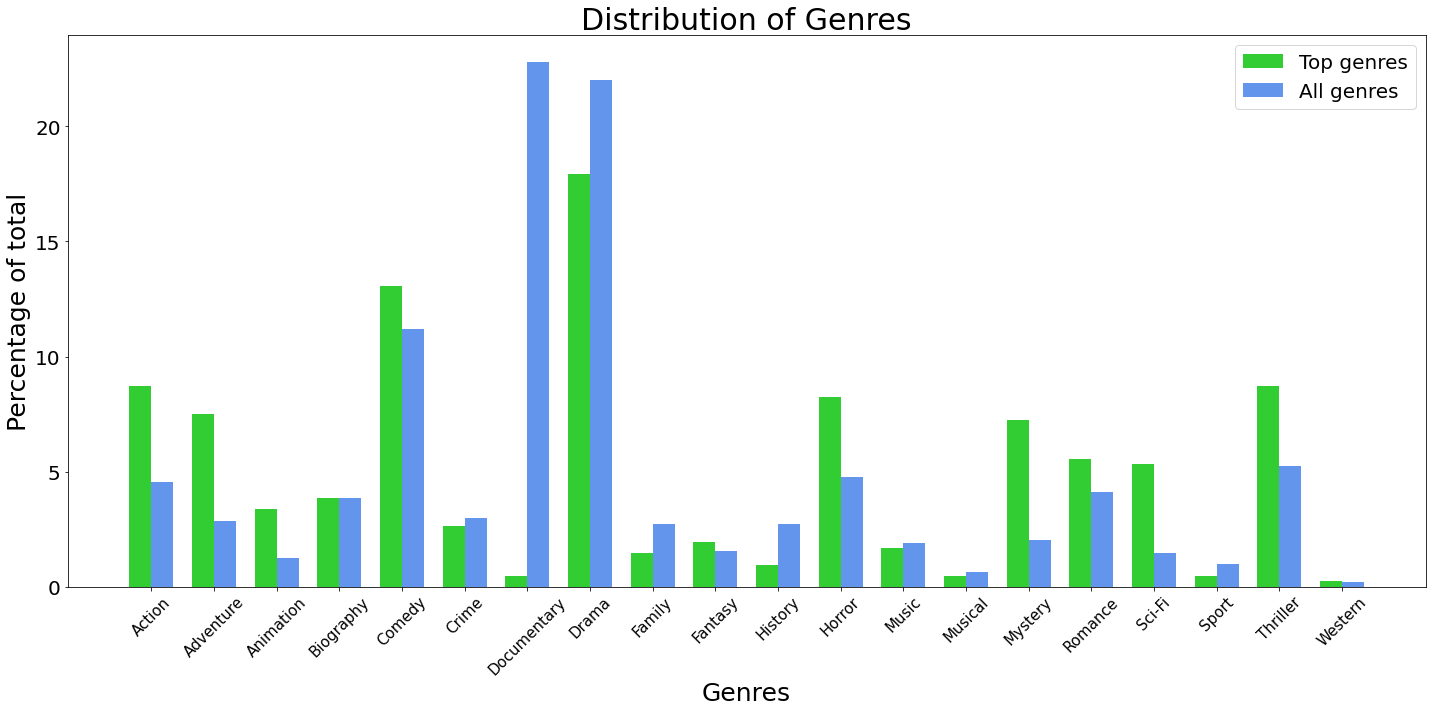

In [109]:
import matplotlib.pyplot as plt
import numpy as np


labels = list(compare_genres_df['genres'])
top_genre_percentages = list(compare_genres_df['percentage_top'])
all_genre_percentages = list(compare_genres_df['percentage_all'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x - width/2, top_genre_percentages, width, label='Top genres', color='limegreen')
ax.bar(x + width/2, all_genre_percentages, width, label='All genres', color='cornflowerblue')

# Add title and labels
ax.set_title('Distribution of Genres', size=30)
ax.set_ylabel('Percentage of total', size=25)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=15, rotation=45)
ax.set_xlabel('Genres', size=25)
ax.legend(fontsize=20)

fig.tight_layout()

plt.show()